<a href="https://colab.research.google.com/github/se-an-alytics/python_projects/blob/main/FoodPricesUSCities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd

url = 'https://raw.githubusercontent.com/se-an-alytics/python_projects/main/Food_Price_Forecasting/CPI_Urban_US_City_avg.csv'
fp_df = pd.read_csv(url)

In [42]:
fp_df.shape

(847, 2)

In [43]:
fp_df.isnull().sum()

DATE    0
CPI     0
dtype: int64

In [44]:
fp_df

,DATE,CPI
0,1/1/1952,31.200
1,2/1/1952,30.700
2,3/1/1952,30.700
3,4/1/1952,30.800
4,5/1/1952,30.800
...,...,...
842,3/1/2022,278.735
843,4/1/2022,281.653
844,5/1/2022,285.711
845,6/1/2022,288.618


In [45]:
fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    847 non-null    object 
 1   CPI     847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [46]:
fp_df['DATE']= pd.to_datetime(fp_df['DATE'])

In [47]:
fp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    847 non-null    datetime64[ns]
 1   CPI     847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.4 KB


In [48]:
import plotly.express as px
fig = px.line(fp_df, x="DATE", y="CPI", title='Food Prices in US Cities')
fig.show()

In [49]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
from fbprophet import Prophet

model = Prophet()

df_prophet = fp_df.rename(columns={'CPI': 'y', 'DATE': 'ds'})
df_prophet.head()

,ds,y
0,1952-01-01,31.2
1,1952-02-01,30.7
2,1952-03-01,30.7
3,1952-04-01,30.8
4,1952-05-01,30.8


In [51]:
model.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
future_cpi = model.make_future_dataframe(periods=365)
forecast = model.predict(future_cpi)
df_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df_forecast.head()

,ds,yhat,yhat_lower,yhat_upper
0,1952-01-01,29.526591,24.789963,33.868993
1,1952-02-01,29.463340,24.957537,34.025279
2,1952-03-01,29.507841,25.111219,33.751682
3,1952-04-01,29.870187,25.310784,34.402827
4,1952-05-01,29.894854,25.495410,34.277299


In [68]:
import plotly as py
import plotly.graph_objs as go

trace_open = go.Scatter(
    x = df_forecast["ds"],
    y = df_forecast["yhat"],
    mode = 'lines',
    name="Forecast"
)

trace_high = go.Scatter(
    x = df_forecast["ds"],
    y = df_forecast["yhat_upper"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Higher uncertainty interval"
)

trace_low = go.Scatter(
    x = df_forecast["ds"],
    y = df_forecast["yhat_lower"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Lower uncertainty interval"
)

trace_close = go.Scatter(
    x = df_prophet["ds"],
    y = df_prophet["y"],
    name="Data values"
)

data = [trace_open,trace_high,trace_low,trace_close]

layout = go.Layout(title="Food Prices US Cities Forecast (1952-Present)", xaxis=dict(title="Date"),yaxis=dict(title="Consumer Price Index"), xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

py.offline.iplot(fig)

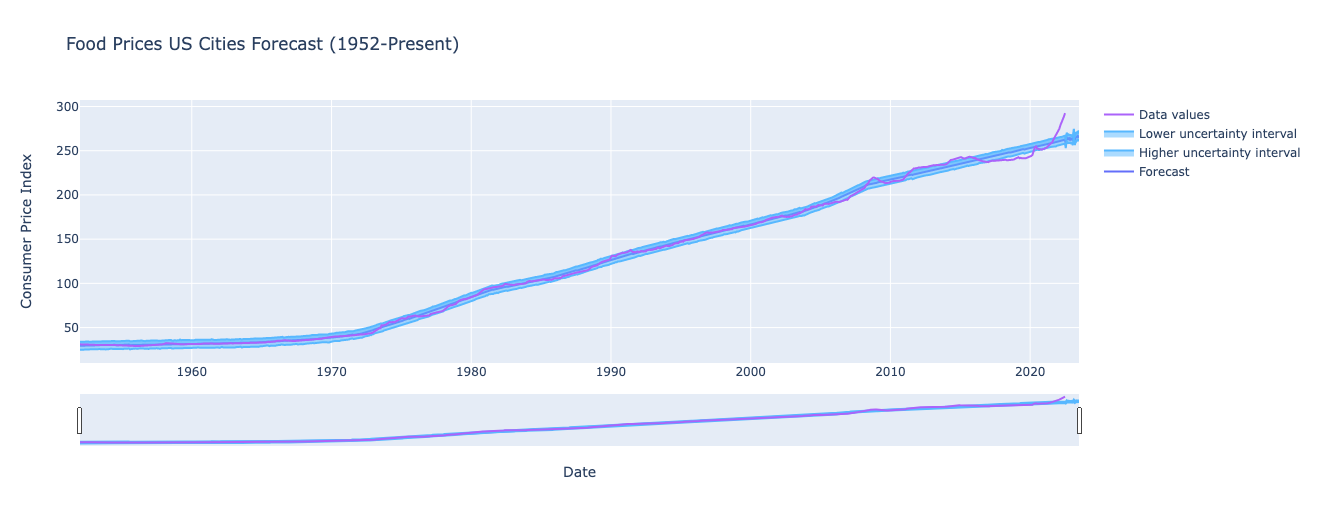

In [58]:
filtered_df = fp_df[(fp_df['DATE'] >= '2020-01-01')]

In [59]:
filtered_df

,DATE,CPI
816,2020-01-01,243.179
817,2020-02-01,244.115
818,2020-03-01,245.207
819,2020-04-01,251.290
820,2020-05-01,253.635
821,2020-06-01,254.850
822,2020-07-01,252.215
823,2020-08-01,252.148
824,2020-09-01,251.303
825,2020-10-01,251.478


In [60]:
model = Prophet()

filtered_df_prophet = filtered_df.rename(columns={'CPI': 'y', 'DATE': 'ds'})
filtered_df_prophet.head()

,ds,y
816,2020-01-01,243.179
817,2020-02-01,244.115
818,2020-03-01,245.207
819,2020-04-01,251.290
820,2020-05-01,253.635


In [61]:
model.fit(filtered_df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [62]:
future_cpi_2020s = model.make_future_dataframe(periods=365)
forecast_2020s = model.predict(future_cpi_2020s)
df_forecast_2020s = forecast_2020s[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df_forecast_2020s.head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-01,243.179,243.179,243.179
1,2020-02-01,244.115,244.115,244.115
2,2020-03-01,245.207,245.207,245.207
3,2020-04-01,251.290,251.290,251.290
4,2020-05-01,253.635,253.635,253.635


In [66]:
trace_open = go.Scatter(
    x = df_forecast_2020s["ds"],
    y = df_forecast_2020s["yhat"],
    mode = 'lines',
    name="Forecast"
)

trace_high = go.Scatter(
    x = df_forecast_2020s["ds"],
    y = df_forecast_2020s["yhat_upper"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Higher uncertainty interval"
)

trace_low = go.Scatter(
    x = df_forecast_2020s["ds"],
    y = df_forecast_2020s["yhat_lower"],
    mode = 'lines',
    fill = "tonexty", 
    line = {"color": "#57b8ff"}, 
    name="Lower uncertainty interval"
)

trace_close = go.Scatter(
    x = filtered_df_prophet["ds"],
    y = filtered_df_prophet["y"],
    name="Data values"
)

data = [trace_open,trace_high,trace_low,trace_close]

layout = go.Layout(title="Food Prices US Cities Forecast (2020-Present)", xaxis=dict(title="Date"),yaxis=dict(title="Consumer Price Index"), xaxis_rangeslider_visible=True)

fig = go.Figure(data=data,layout=layout)

py.offline.iplot(fig)

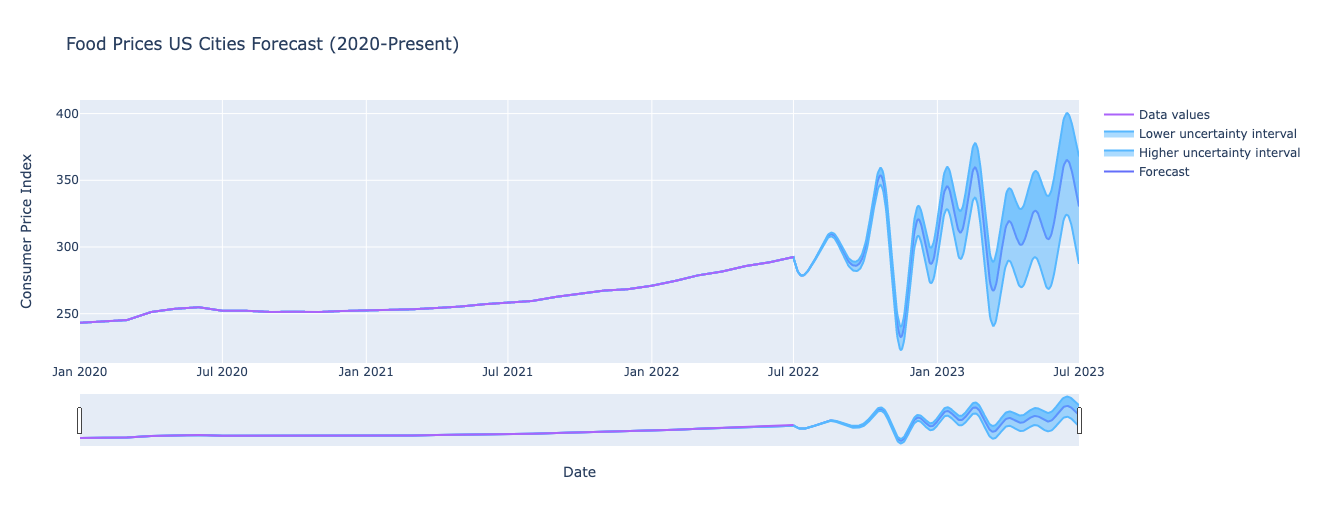